In [1]:
import streamlit as st
import utility
import pandas as pd 
import numpy as np
from utility import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
YEARS = list(range(2023, 2025))

In [3]:
utility.retrieve_betting_data(YEARS) 

File already exists, skipping: betting_data/2023.xlsx
File already exists, skipping: betting_data/2024.xlsx


### Proposed Strategy
I want to see how value betting can be leveraged to gain a long-term edge over the bookmaker. We will explore different models that could help us evaluate what the odds truly are later. This is the basis of value betting and here’s a brief explanation of how it works:


##### How It Works

1. **Calculate True Probability**: Use data or models to estimate the actual likelihood of an event.  
   Example: If a tennis player has a 60% chance of winning, the **true odds** are:
   $$
   \text{True Odds} = \frac{1}{0.6} = 1.67
   $$

2. **Compare with Bookmaker Odds**: If the bookmaker offers odds of 2.00, the bet has value:
   $$
   \text{Value} = 0.6 \times 2.00 = 1.2
   $$

   Since the value is greater than 1, it’s a profitable bet.

##### How Do Odds Work?

Odds represent the likelihood of an event and determine how much you can win on a bet. They can be expressed as **decimal**, **fractional**, or **moneyline** odds.

##### Example:
- Decimal odds of **2.50** mean you win $2.50 for every $1 bet (including your stake).
- If you bet $10 on odds of 2.50, your total return is:
  $$
  \text{Return} = 10 \times 2.50 = 25
  $$
  Your profit is $15 ($25 - $10 stake).



### Evaluating bookmarker's success rate:

In [4]:
def evaluate_bookmaker_accuracy(df, bookmaker_prefix):
    odds_winner_col = bookmaker_prefix + 'W'
    odds_loser_col = bookmaker_prefix + 'L'
    mask_valid = (
        df[odds_winner_col].notnull() & 
        df[odds_loser_col].notnull() & 
        (df[odds_winner_col] > 0) & 
        (df[odds_loser_col] > 0)
    )
    valid_df = df[mask_valid].copy()
    valid_df["bookmaker_favorite_is_dataset_winner"] = (
        valid_df[odds_winner_col] < valid_df[odds_loser_col]
    )
    accuracy = valid_df["bookmaker_favorite_is_dataset_winner"].mean()
    return accuracy

df = pd.read_excel("betting_data/2018.xlsx")
bookmakers = ["B365", "EX", "LB", "PS"]
bookmakers_abbrev_to_full = {"B365": "Bet365", "EX": "Expekt", "LB": "Ladbrokes", "PS": "Pinnacle Sports"}
results = {}

for bm in bookmakers:
    acc = evaluate_bookmaker_accuracy(df, bm)
    results[bm] = acc
for bm in bookmakers:
    print(f"{bookmakers_abbrev_to_full[bm]}: {results[bm]:.2%}")

Bet365: 66.50%
Expekt: 67.61%
Ladbrokes: 65.59%
Pinnacle Sports: 67.94%


### Looking into naive betting Strategies:
1. Random betting (coin flip, heads to favorite, tails to underdog)
2. Bet with player with higher bookmaker's odds
3. Bet player with higher ranking

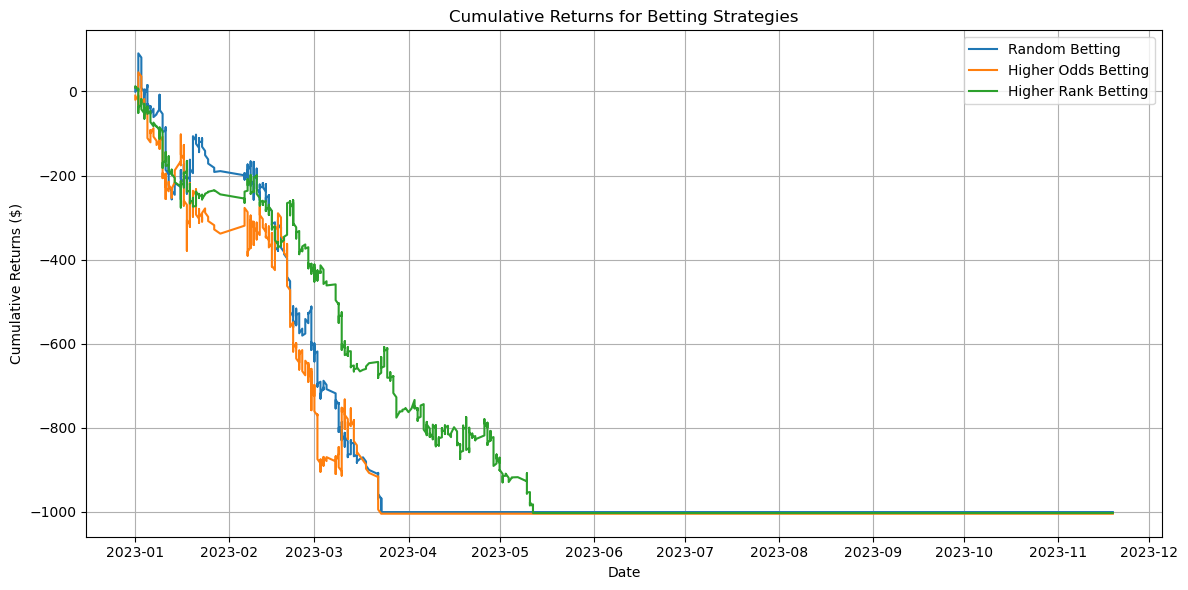

In [12]:
def plot_betting_strategies(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Cumulative_Random'], label='Random Betting')
    plt.plot(df['Date'], df['Cumulative_HigherOdds'], label='Higher Odds Betting')
    plt.plot(df['Date'], df['Cumulative_HigherRank'], label='Higher Rank Betting')
    plt.title('Cumulative Returns for Betting Strategies')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

file_path = 'betting_data/2023.xlsx'
df = calculate_betting_strategies(file_path, initial_cash=1000)
plot_betting_strategies(df)


In [19]:
def abbreviate_name(full_name):
    parts = full_name.split()
    if len(parts) == 2:
        last_name = parts[1]
        first_name_initial = parts[0][0].upper() + '.'
        return f"{last_name} {first_name_initial}"
    return None

df['generated_abbreviation'] = df['full_name'].apply(abbreviate_name)
df['match'] = df['abbreviated_name'] == df['generated_abbreviation']

print(df)

       full_name abbreviated_name generated_abbreviation  match
0  Steve Johnson       Johnson S.             Johnson S.   True
1  Michael Smith         Smith M.               Smith M.   True
2    Alice Brown         Brown A.               Brown A.   True
